# PPREDICT IMPLICIT SEXUAL DISCRIMINATION

In [233]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.io as pio
import plotly.figure_factory as ff
import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import StandardScaler

In [234]:
df = pd.read_csv('df_ready.csv', index_col=0)
df = df.reset_index(drop=True)
list_numericals = ['iat', 'y_birth', 'prefer_straight', 'edu', 'liberal', 'religious']
num = df[list_numericals]

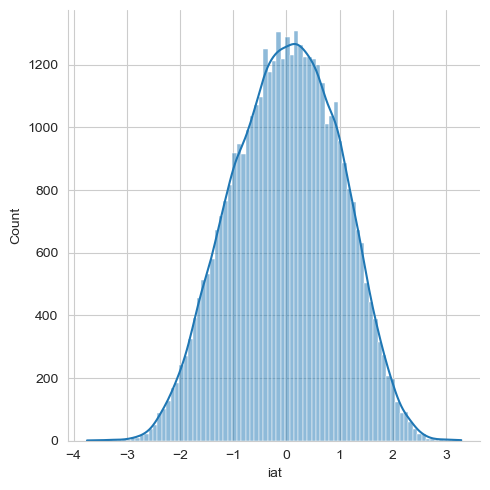

In [235]:
sns.displot(data=df, x='iat', kde=True)

In [236]:
## correlation matrix
corr_matrix = abs(num.corr())

for i in range(0, len(num.columns)):
    corr_matrix.iloc[i, i:] = 0

fig = px.imshow(corr_matrix, text_auto=False, color_continuous_scale='BuPu')
fig.update_layout(height=600, width=600, title_text="CORRELATION MATRIX")
fig.show()

## DATA EXPLORATION WITH OLS REGRESSION


In [237]:
## define functions
def LinearRegression(y,x):
    x = sm.add_constant(x)
    ols = sm.OLS(y, x).fit()
    ols_table = ols.summary()
    return ols_table

def TableResults(ols_table):
    ## format the ols table
    table = pd.DataFrame(ols_table.tables[1])
    list_col = ['ind_var', 'coef', 'std_err', 't_val', 'p_val', 'low_ci', 'high_ci']
    for num in range(0,len(table.columns)):
        table.rename(columns={table.columns[num]: f"{list_col[num]}" }, inplace = True)
    table = table.iloc[1:,:]
    #ols = sm.OLS(y, x).fit()
    #table['obs'] = ols.nobs
    table.rename(columns={"P>|t|": "p_val", "[0.025": "low_ci", "0.975]": "high_ci"}, inplace=True)
    table = table.set_index(table.columns[0])
    table = round(table, 3)
    table_results = table.applymap(str).applymap(float)
    return table_results

In [238]:
## apply ols regression
y = df['iat']
x = df.drop(['iat'], axis = 1)
ols = sm.OLS(y, x).fit()
ols_table = LinearRegression(y, x)
table_results = TableResults(ols_table)
table_results

,coef,std_err,t_val,p_val,low_ci,high_ci
ind_var,,,,,,
const,0.1851,0.430,0.430,0.667,-0.658,1.028
y_birth,-0.1169,0.005,-22.199,0.000,-0.127,-0.107
prefer_straight,0.3460,0.005,71.921,0.000,0.337,0.355
edu,-0.0237,0.005,-4.453,0.000,-0.034,-0.013
liberal,-0.1985,0.005,-40.037,0.000,-0.208,-0.189
religious,0.0446,0.005,9.728,0.000,0.036,0.054
test,-0.0113,0.008,-1.346,0.178,-0.028,0.005
birthsex_Male,-0.0019,0.009,-0.205,0.838,-0.020,0.016
gn_id_non_binary,0.0120,0.025,0.473,0.636,-0.038,0.062


In [239]:
## FEATURE SELECTION Select p values < .2
table_results_sub = table_results.loc[table_results['p_val'] < .2 ,:]
table_results_sub.reset_index(inplace=True)
list_vars = table_results_sub['ind_var']

list_vars = []
for i in range(len(table_results_sub.index)):
    list_vars.append(str(table_results_sub.iloc[i,0]))

#df = df[list_vars]

In [251]:
import matplotlib.pyplot as plt

def PlotOls(table):
    ## prepare the data
    n_coeff = len(table.index)
    table = table.iloc[0:n_coeff, :]
    lower = table['low_ci']
    upper = table['high_ci']
    table['variables'] = table.index.values
    n = len(table)
    l = range(0, n)
    labels = [0] * n
    names = table['variables']
    ##plot
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot((lower,upper), (l, l), 'ro-', color='blue', linewidth=2, markersize=2)
    plt.scatter(x=table.coef, y=range(0,len(table)))
    ax.tick_params(axis='both', which='both')
    plt.yticks(range(0, n), names)
    plt.plot(labels, l, '--', color='red', linewidth=2, markersize=2)
    ax.set_ylabel('Coefficients', fontsize=10)
    plt.scatter(lower-.002, l, marker='|', color='blue')
    plt.scatter(upper+.002, l, marker='|', color='blue')
    ax.set_facecolor('white')
    plt.title('CORRELATION WITH IMPLICIT SEXUAL DISCRIMINATION \nOLS coefficients - 95% Confidence Intervals', fontsize=15)
    plt.savefig("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/MidTermProject/results/coefplot.jpeg",
                bbox_inches='tight')

In [243]:
col_names = ["Constant", "Year of birth", "Prefer straights", "Education", "Political: liberal",
             "Religious", "Test", "Male", "Gender id.: non-binary", "Straight", "Queer", "Ethn: East Asia",
             "Ethn: Multiracial", "Ethn, Other", "Ethn: South Asia", "Ethn: White", "Input: straight first", "Has gay fam. member", "Has gay friend", "Gay friendly", "Ever met gay person", "Against Adoption", "Against Marriage", "Against Relationships", "Against workplace", "Against transgender bathrooms"]

table_results.index = col_names
table_results

,coef,std_err,t_val,p_val,low_ci,high_ci
Constant,0.1851,0.430,0.430,0.667,-0.658,1.028
Year of birth,-0.1169,0.005,-22.199,0.000,-0.127,-0.107
Prefer straights,0.3460,0.005,71.921,0.000,0.337,0.355
Education,-0.0237,0.005,-4.453,0.000,-0.034,-0.013
Political: liberal,-0.1985,0.005,-40.037,0.000,-0.208,-0.189
Religious,0.0446,0.005,9.728,0.000,0.036,0.054
Test,-0.0113,0.008,-1.346,0.178,-0.028,0.005
Male,-0.0019,0.009,-0.205,0.838,-0.020,0.016
Gender id.: non-binary,0.0120,0.025,0.473,0.636,-0.038,0.062
Straight,0.0081,0.010,0.825,0.409,-0.011,0.027


C:\Users\tomma\AppData\Local\Temp\ipykernel_9280\3687256376.py:16: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.



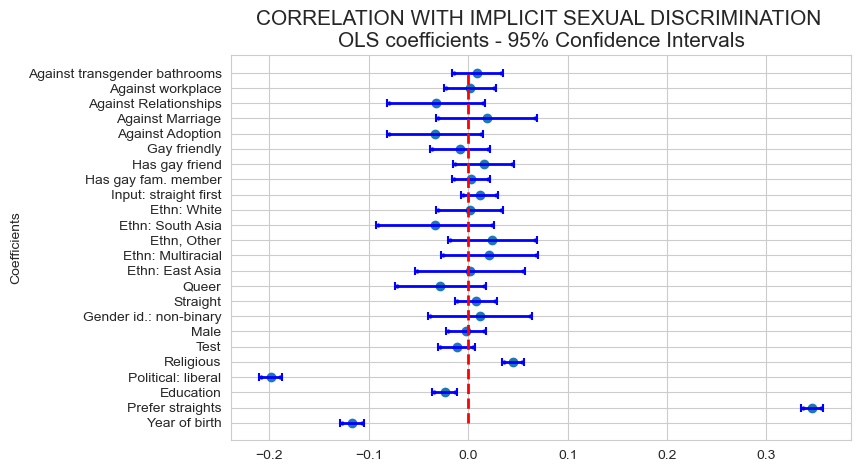

In [252]:
table_results2 = table_results.iloc[(table_results.index!='Constant') & (table_results.index!='Ever met gay person')]

PlotOls(table_results2)

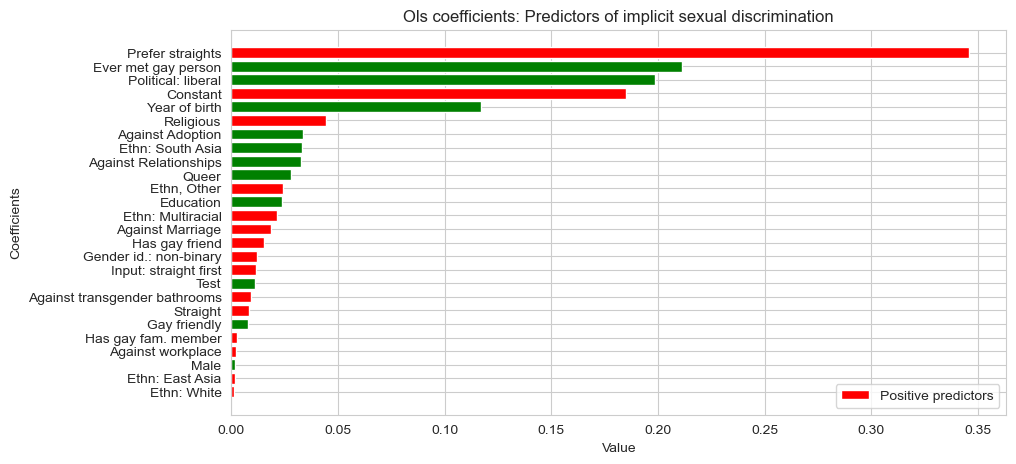

In [222]:
bars = table_results['coef']
bars = pd.DataFrame(bars)
bars['value'] = np.where(bars['coef']>0, 1, 0)
bars['coef'] = abs(bars['coef'])
bars = bars.sort_values(by="coef")
bars['colors'] = np.where(bars['value']==0, "green", "red")

fig = plt.figure(figsize = (10, 5))
plt.barh(bars.index, bars['coef'], color=bars['colors'])
plt.xlabel("Value")
# y-axis label
plt.ylabel("Coefficients")
# Title of the figure
plt.title("Ols coefficients: Predictors of implicit sexual discrimination")
plt.legend(['Positive predictors', 'Negative predicgors'], loc='lower right')
plt.show()


## SPLIT TEST TRAINING (I use 2020 data as train set, 2021 as test) and make prediction

In [223]:
# splitting
def SplitDataFrame(df):
    df_training = df.loc[df.test == 0]
    df_test = df.loc[df.test == 1]

    x_tr, y_tr = df_training.drop(['iat'], axis=1), df_training['iat']
    x_ts, y_ts = df_test.drop(['iat'], axis=1), df_test['iat']

    return x_tr, y_tr, x_ts, y_ts

x_tr, y_tr, x_ts, y_ts = SplitDataFrame(df)

## 1) Linear Regression

In [224]:
## 1) Linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_tr, y_tr)

## chec r squared
r2_ols = reg.score(x_tr, y_tr)

## y predicted
y_pred_ols = reg.predict(x_ts)

print("R2 Ols :", r2_ols)

R2 Ols : 0.2578554318549392


## 2) Random Forest Regressor

In [225]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

numerical_columns = df[list_numericals]
categorical_columns = df.drop(numerical_columns, axis=1)

In [226]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
## PARAMETER TUNING WITH RF REGRESSOR (15-20 mins to run)
'''
rfc = RandomForestRegressor()
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [2, 4],
    #'max_features': ['sqrt', 'log2'],
    'bootstrap':[True,False]
}
grid_search = GridSearchCV(rfc, param_grid, cv=5,return_train_score=True,n_jobs=-1,)
grid_search

grid_search.fit(x_tr, y_tr)

params = pd.DataFrame(grid_search.cv_results_)
'''

"\nrfc = RandomForestRegressor()\nparam_grid = {\n    'n_estimators': [200, 400],\n    'max_depth': [10, 20],\n    'min_samples_split': [3, 5],\n    'min_samples_leaf': [2, 4],\n    #'max_features': ['sqrt', 'log2'],\n    'bootstrap':[True,False]\n}\ngrid_search = GridSearchCV(rfc, param_grid, cv=5,return_train_score=True,n_jobs=-1,)\ngrid_search\n\ngrid_search.fit(x_tr, y_tr)\n\nparams = pd.DataFrame(grid_search.cv_results_)\n"

In [232]:
#grid_search.best_params_ #To check the best set of parameters returned

In [ ]:
## Display best n. estimators (~15 mins)
def GetRF_r2(x_tr, y_tr, estimators):
    rfr = RandomForestRegressor(random_state=284567,
                                max_depth=10,
                                n_estimators=estimators,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                bootstrap=False)

    rfr.fit(x_tr, y_tr)
    r2_rfr = rfr.score(x_tr, y_tr)
    return r2_rfr

n_estimators = 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700
r2 = []
for i in n_estimators:
    current_r2 = GetRF_r2(x_tr, y_tr, i)
    r2.append(current_r2)

plt.plot(r2)

In [ ]:
## Apply random forest
rfr = RandomForestRegressor(random_state=284567,
                            max_depth=10,
                            n_estimators=n_estimators[7],
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='sqrt',
                            bootstrap=False)

rfr.fit(x_tr, y_tr)

## prediction
y_pred_rfr = rfr.predict(x_ts)

## Check r squared
r2_rfr = rfr.score(x_tr, y_tr)
print("R2 Ranfom forest: ", r2_rfr)

#### Confront ols with Random forest

In [ ]:
## PLOT R SQUARED
r2 = [r2_ols, r2_rfr]

plt.bar(['OLS', 'RanfoM Forest'], r2, width=0.4, bottom=None, align='center')
plt.title("R sq.")

In [ ]:
## Confronting prediction by model
prediction = pd.DataFrame()
prediction["Y test"], prediction["Y pred OLS"], prediction['Y pred RFR'] = y_ts, y_pred_ols, y_pred_rfr

## plot it
fig, ax = plt.subplots()

x, y = prediction['Y test'], prediction['Y pred OLS']
scale = 20
ax.scatter(x, y, c='blue', s=scale, label='OLS', alpha=0.3, edgecolors='none')

x, y = prediction['Y test'], prediction['Y pred RFR']
scale = 20
ax.scatter(x, y, c='orange', s=scale, label='Random Forest', alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title("Prediction by model")
plt.show()